### Predict Diabetes using XGBoost local mode

In [2]:
# install xgboost in notebook instance
! pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.6 MB/s eta 0:00:00:00:0100:01


In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
column_list_file = 'diabetes_training_column_list.txt'
train_file = 'diabetes_train.csv'
validation_file = 'diabetes_validation.csv'

In [7]:
# Restore columns 
columns=[]
with open(column_list_file,'r') as f:
    columns = f.read().split(',')
    
columns

['diabetes_class',
 'preg_count',
 'glucose_concentration',
 'diastolic_bp',
 'triceps_skin_fold_thickness',
 'two_hr_serum_insulin',
 'bmi',
 'diabetes_pedi',
 'age']

In [9]:
# read train and validation into dataframe

df_train = pd.read_csv(train_file, names=columns)
df_validation = pd.read_csv(validation_file, names=columns)

In [10]:
df_train.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,6,92,62,32,126,32.0,0.085,46
1,0,5,132,80,0,0,26.8,0.186,69
2,0,3,106,72,0,0,25.8,0.207,27
3,0,4,99,68,38,0,32.8,0.145,33
4,0,4,96,56,17,49,20.8,0.340,26


In [11]:
df_validation.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,1,130,70,13,105,25.9,0.472,22
1,1,8,133,72,0,0,32.9,0.270,39
2,0,0,137,68,14,148,24.8,0.143,21
3,0,2,88,74,19,53,29.0,0.229,22
4,1,9,130,70,0,0,34.2,0.652,45


In [14]:
# splitting X and y from datasets

X_train = df_train.iloc[:, 1:] # Features from 1st column
y_train = df_train.iloc[:, 0].ravel() # first column label as list

X_validation = df_validation.iloc[:, 1:]
y_validation = df_validation.iloc[:, 0].ravel()

In [17]:
# Launch a classifier

classifier = xgb.XGBClassifier(objective = "binary:logistic")

In [18]:
classifier.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
classifier.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_validation, y_validation)],
            eval_metric=['logloss'],
            early_stopping_rounds=10)

[0]	validation_0-logloss:0.52191	validation_1-logloss:0.56646
[1]	validation_0-logloss:0.44164	validation_1-logloss:0.53907
[2]	validation_0-logloss:0.38850	validation_1-logloss:0.52374
[3]	validation_0-logloss:0.34971	validation_1-logloss:0.51755
[4]	validation_0-logloss:0.31881	validation_1-logloss:0.51622
[5]	validation_0-logloss:0.29696	validation_1-logloss:0.51488
[6]	validation_0-logloss:0.27601	validation_1-logloss:0.52174
[7]	validation_0-logloss:0.26337	validation_1-logloss:0.51949
[8]	validation_0-logloss:0.24812	validation_1-logloss:0.51747
[9]	validation_0-logloss:0.23522	validation_1-logloss:0.52216
[10]	validation_0-logloss:0.22014	validation_1-logloss:0.53212
[11]	validation_0-logloss:0.21153	validation_1-logloss:0.53560
[12]	validation_0-logloss:0.19995	validation_1-logloss:0.53719
[13]	validation_0-logloss:0.19365	validation_1-logloss:0.53574
[14]	validation_0-logloss:0.18719	validation_1-logloss:0.54294
[15]	validation_0-logloss:0.18058	validation_1-logloss:0.54953


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
classifier.set_params(eval_metric=['logloss'], early_stopping_rounds=10)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['logloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [23]:
classifier.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-logloss:0.52191	validation_1-logloss:0.56646
[1]	validation_0-logloss:0.44164	validation_1-logloss:0.53907
[2]	validation_0-logloss:0.38850	validation_1-logloss:0.52374
[3]	validation_0-logloss:0.34971	validation_1-logloss:0.51755
[4]	validation_0-logloss:0.31881	validation_1-logloss:0.51622
[5]	validation_0-logloss:0.29696	validation_1-logloss:0.51488
[6]	validation_0-logloss:0.27601	validation_1-logloss:0.52174
[7]	validation_0-logloss:0.26337	validation_1-logloss:0.51949
[8]	validation_0-logloss:0.24812	validation_1-logloss:0.51747
[9]	validation_0-logloss:0.23522	validation_1-logloss:0.52216
[10]	validation_0-logloss:0.22014	validation_1-logloss:0.53212
[11]	validation_0-logloss:0.21153	validation_1-logloss:0.53560
[12]	validation_0-logloss:0.19995	validation_1-logloss:0.53719
[13]	validation_0-logloss:0.19365	validation_1-logloss:0.53574
[14]	validation_0-logloss:0.18719	validation_1-logloss:0.54294


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['logloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [25]:
classifier.evals_result()

{'validation_0': OrderedDict([('logloss',
               [0.5219079302675897,
                0.4416370317478642,
                0.38850433156033026,
                0.34971233501725135,
                0.31880635192385376,
                0.29696237612203513,
                0.27600607044259484,
                0.26336632188915987,
                0.24812070136366055,
                0.23522166230367217,
                0.22014396254049556,
                0.2115345998776442,
                0.19994722582483093,
                0.19365176244585097,
                0.18718537912154276,
                0.1805765947328752])]),
 'validation_1': OrderedDict([('logloss',
               [0.566456571672902,
                0.5390733043739806,
                0.5237447898754309,
                0.5175500364724176,
                0.5162176880421061,
                0.514884462765543,
                0.5217398014484029,
                0.5194876125622622,
                0.5174713841764442,
  

In [26]:
eval_result = classifier.evals_result()
training_rounds = len(eval_result['validation_0']['logloss'])

In [27]:
training_rounds

16

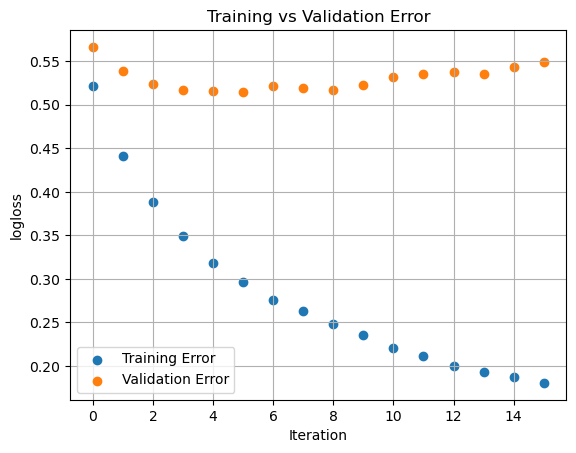

In [28]:
plt.scatter(x = range(training_rounds), y = eval_result['validation_0']['logloss'], label='Training Error')
plt.scatter(x = range(training_rounds), y = eval_result['validation_1']['logloss'], label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('logloss')
plt.title('Training vs Validation Error')
plt.legend()
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

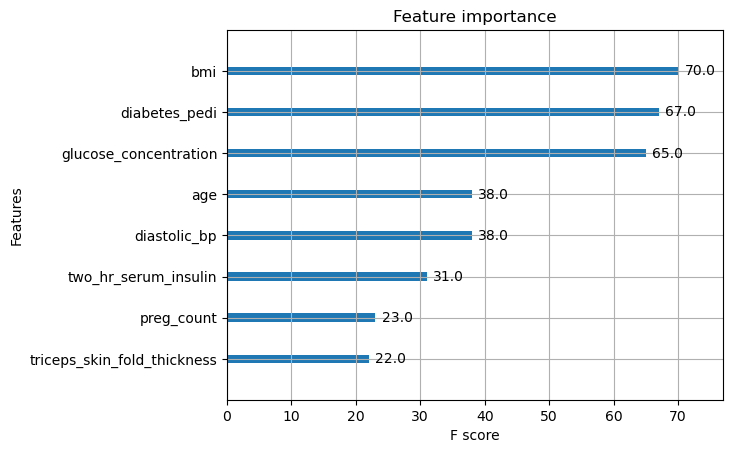

In [29]:
xgb.plot_importance(classifier)

In [30]:
df = pd.read_csv(validation_file, names=columns)

In [31]:
df.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,1,130,70,13,105,25.9,0.472,22
1,1,8,133,72,0,0,32.9,0.270,39
2,0,0,137,68,14,148,24.8,0.143,21
3,0,2,88,74,19,53,29.0,0.229,22
4,1,9,130,70,0,0,34.2,0.652,45


In [32]:
X_test = df.iloc[:,1:]

In [33]:
result = classifier.predict(X_test)

In [35]:
result[:5]

array([0, 0, 0, 0, 1])

In [36]:
df['predicted_class']=result

In [37]:
df.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,predicted_class
0,0,1,130,70,13,105,25.9,0.472,22,0
1,1,8,133,72,0,0,32.9,0.270,39,0
2,0,0,137,68,14,148,24.8,0.143,21,0
3,0,2,88,74,19,53,29.0,0.229,22,0
4,1,9,130,70,0,0,34.2,0.652,45,1


### Binary Classifier Metrics

In [38]:
# Reference: https://scikit-learn.org/stable/modules/model_evaluation.html
# Explicitly stating labels. Pass=1, Fail=0
def true_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 0]

def true_negative(y_true, y_pred): 
    return confusion_matrix(y_true,y_pred,labels=[1,0])[1, 1]

def false_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[1, 0]

def false_negative(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 1]

In [39]:
# Compute Binary Classifier Metrics
# Returns a dictionary {"MetricName":Value,...}

def binary_classifier_metrics(y_true, y_pred):
    metrics = {}

    # References: 
    #  https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html
    #  https://en.wikipedia.org/wiki/Confusion_matrix
    
    # Definition:
    # true positive = tp = how many samples were correctly classified as positive (count)
    # true negative = tn = how many samples were correctly classified as negative (count)
    # false positive = fp = how many negative samples were mis-classified as positive (count)
    # false_negative = fn = how many positive samples were mis-classified as negative (count)
    
    # positive = number of positive samples (count)
    #          = true positive + false negative
    # negative = number of negative samples (count)
    #          = true negative + false positive
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    positive = tp + fn
    negative = tn + fp
    
    metrics['TruePositive'] = tp
    metrics['TrueNegative'] = tn
    metrics['FalsePositive'] = fp
    metrics['FalseNegative'] = fn
    
    metrics['Positive'] = positive
    metrics['Negative'] = negative
    
    # True Positive Rate (TPR, Recall) = true positive/positive
    # How many positives were correctly classified? (fraction)
    # Recall value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        recall = 0
    else:
        recall = tp/positive
        
    metrics['Recall'] = recall
    
    # True Negative Rate = True Negative/negative
    # How many negatives were correctly classified? (fraction)
    # True Negative Rate value closer to 1 is better. closer to 0 is worse
    if tn == 0:
        tnr = 0
    else:
        tnr = tn/(negative)
    metrics['TrueNegativeRate'] = tnr
    
    # Precision = True Positive/(True Positive + False Positive)
    # How many positives classified by the algorithm are really positives? (fraction)
    # Precision value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        precision = 0
    else:
        precision = tp/(tp + fp)
    metrics['Precision'] = precision
    
    # Accuracy = (True Positive + True Negative)/(total positive + total negative)
    # How many positives and negatives were correctly classified? (fraction)
    # Accuracy value closer to 1 is better. closer to 0 is worse
    accuracy = (tp + tn)/(positive + negative)
    metrics['Accuracy'] = accuracy
    
    # False Positive Rate (FPR, False Alarm) = False Positive/(total negative)
    # How many negatives were mis-classified as positives (fraction)
    # False Positive Rate value closer to 0 is better. closer to 1 is worse
    if fp == 0:
        fpr = 0
    else:
        fpr = fp/(negative)
    metrics['FalsePositiveRate'] = fpr
    
    # False Negative Rate (FNR, Misses) = False Negative/(total Positive)
    # How many positives were mis-classified as negative (fraction)
    # False Negative Rate value closer to 0 is better. closer to 1 is worse
    fnr = fn/(positive)
    metrics['FalseNegativeRate'] = fnr
    
    # F1 Score = harmonic mean of Precision and Recall
    # F1 Score closer to 1 is better. Closer to 0 is worse.
    if precision == 0 or recall == 0:
        f1 = 0
    else:        
        f1 = 2*precision*recall/(precision+recall)

    metrics['F1'] = f1
    
    return metrics